## Boosting
- **오분류된 데이터에 초점을 맞추어 더 많은 가중치를 주는 방식**
- 초기에는 모든 데이터가 동일한 가중치를 가지지만, 각 round가 종료된 후 가중치와 중요도를 계산함
- 복원추출시에 가중치 분포를 고려
- 오분류된 데이터가 가중치를 더 얻게 됨에 따라 다음 round에서 더 많이 고려됨
- Boosting 기법으로 **AdaBoost**, LPBoost, TotalBoost, BrownBoost, MadaBoost, LogitBoost, **Gradient Boosting** 등이 있음

### AdaBoost(Adaptive Boost) 예시
1. 모든 데이터에 대해 가중치를 동일하게 1로 설정
2. Round1에서 빨간색 네모의 데이터가 수집되며, 이를 기반으로 분류 기준값인 B1을 설정
  - B1보다 작은 경우 +, 큰 경우 -로 분류
3. 데이터 i에 대해 m번째 round에서의 가중치를 업데이트
  - **오분류된 데이터에 가중치를 크게, 정분류된 데이터에 가중치를 작게 설정**
4. 업데이트한 가중치의 확률로 샘플을 재수집
5. 4번의 결과로 round2의 빨간색 네모의 데이터가 수집
6. 수집된 데이터로 모형을 학습한 결과 B2가 분류 기준값으로 도출됨
7. 가중치 업데이트
8. 이와 같은 방법을 설정한 반복 횟수만큼 반복
9. 예시에서 Round 3까지의 결과를 종합하면 Original Data와 동일한 결과가 도출됨
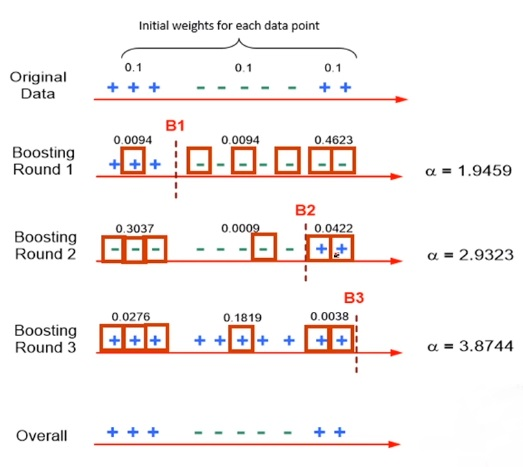

- 최종 의사결정 방법
  - $H(x)=sign\{\sum_{m=1}^{M}a_mh_m(x)\}$
  - $H(x)$ : 최종 분류기(final classifier)
  - $a_m$ : m라운드에서 생성된 약한 분류기에 대한 가중치
  - $h_m$ : m라운드에서 생성된 약한 분류기
  
  
- $a_m$이 크다는 것은 $\epsilon_m$이 작다는 의미(즉 분류기 $m$이 좋은 성능을 보임)
- $a_m$이 작다는 것은 $\epsilon_m$이 크다는 의미(즉 분류기 $m$이 안 좋은 성능을 보임)

## Gradient Boosting
- Boosting 기법들 간 차이는 오분류된 데이터를 다음 Round에 어떻게 반영할 것인가의 차이
- AdaBoost는 오분류된 데이터들에 더 큰 가중치를 주어 다음 Round 샘플링에 반영
- Gradient Boosting은 이전 Round의 합성 분류기 $H_{t-1}(x)=\sum_{m=1}^{t-1}a_mh_m(x)$의 데이터 별 오류를 예측하는 새로운 약한 분류기 학습

### y를 예측하는 모델을 만들어보도록 하자
- $x$를 입력받아 $y$를 예측하는 모델 $h_0$가 있다고 하자. : $y=h_0(x)+error$
- Error가 예측 불가능한 랜덤 노이즈가 아닌 경우, 예측 성능을 올리는 가장 직관적인 방법은 **error를 제거하는 것**
  - 오차를 제거하는 하위 error decistion tree를 만들어 더하는 방법(잔차에 대한 학습)
  - $error=h_1(x)+error2, error2=h_2(x)+error3$
  - $y=h_0(x)+h_1(x)+h_2(x)+...+small error$
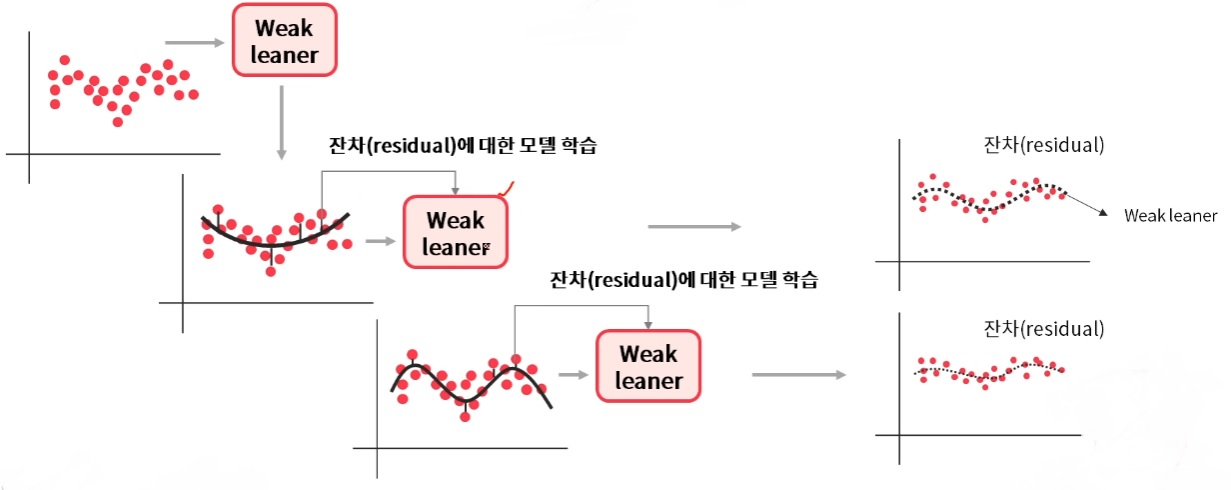

#### 왜 Gradient라는 명칭이 붙었을까?
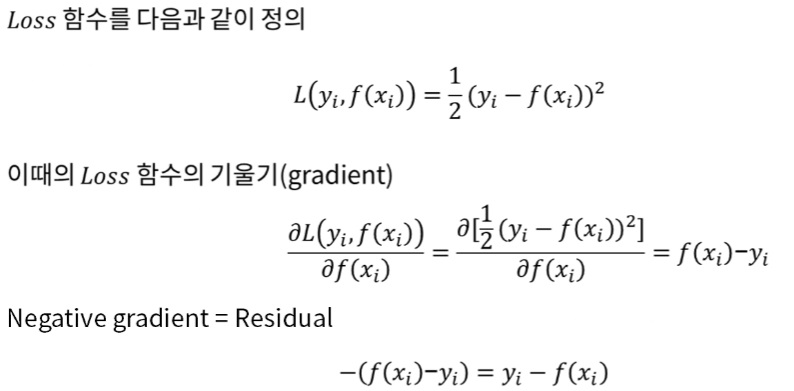
- Negative gradient(residual)를 최소화 시키면서 학습시키기 때문에 gradient boosting이라고 부름

## Gradient Boosting의 종류
- 어떻게 사용하는지 라이브러리 사용법만 알고 간다 해도 개이득임.
### 1. XGBoost
- 머신러닝 알고리즘 대회인 Kaggle competition과 KDD Cup에서 우수한 성적을 낸 팀들이 XGBoost를 많이 활용한 것이 알려지면서 주목을 받음
- Gradient Boosting 개념을 의사 결정 나무에 도입한 알고리즘으로 데이터 별 오류를 다음 Round 학습에 반영시킨다는 측면에서 기존 Gradient Boosting과 큰 차이는 없음
- 다만, XGBoost는 Gradient Boosting과는 달리 학습을 위한 목적식에 **Regularization Term이 추가되어 모델이 과적합되는 것을 방지**함
- Regularization Term을 통해 XGBoost는 복잡한 모델에 패널티를 부여함
- $dbj^{(t)}=\sum_{i=1}^{n}l(Y_i,\hat{Y}_i^{(t)}+\sum_{i=1}^{t}\ohm(f_i)$

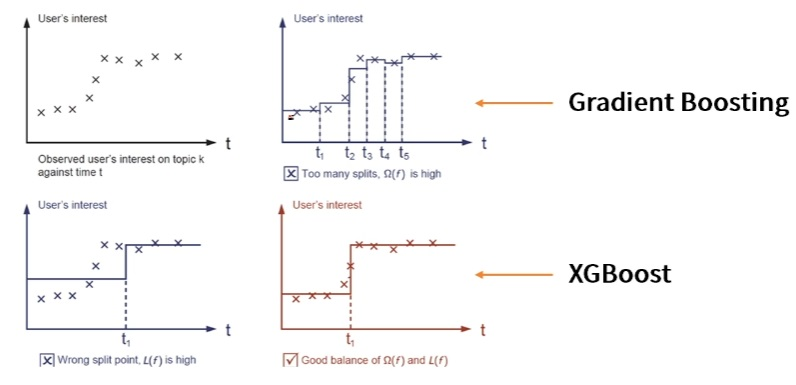
- 위는 특정 주제에 대한 유저의 흥미 변화를 모델리하는 문제임
- 오류를 최소화하기 위해 약한 분류기를 너무 많이 학습할 위험이 있는 Gradient Boosting은 과적합에 취약함
- Gradient Boosting에 비해 심플한 결과가 나온 것 뿐이지, 모델 자체는 되게 복잡함

### 2. LightGBM
- SGBoost와 다르게 leaf-wise loss 사용(loss를 더 줄일 수 있음)
  - 더 깊이 내려갈 수 있는 특징을 가짐
- XGBoost 대비 2배 이상 빠른 속도(동일 파라미터 기준), GPU 지원
  - GPU/CPU별 라이브러리가 따로 존재.
- Overfitting에 민감하여 대량의 학습 데이터를 필요로 한다.
  - XGBoost에 비해 속도가 빠르지만 Overfitting이 비교적 많이 일어남
- 요런 이유로 XGBoost보다 LightGBM 사용하는 것을 더 추천하는 편임
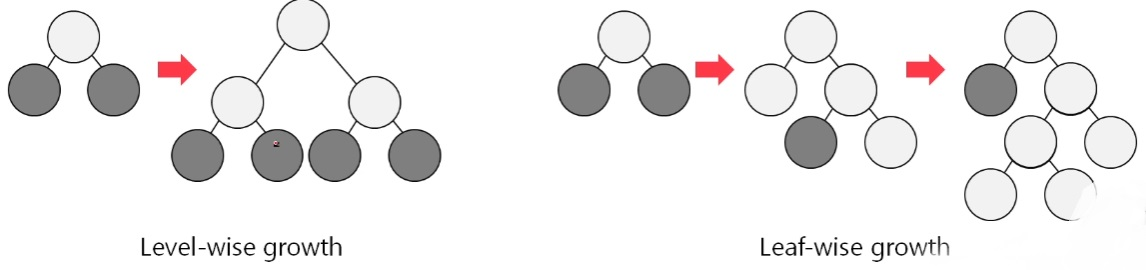

### 3. CatBoost(unbiased boosting with Categorical features)
- 잔차 추정의 분산을 최소로 하면서 bias를 피하는 boosting기법
- 관측치를 포함한 채로 boosting하지 말고, 관측치를 뺀 채로 학습해서 그 관측치에 대한 unbiased residual을 구하고 학습하자는 아이디어
- **Categorical features가 많은 경우 잘 맞는다고 알려져 있음**
- Categorical feature를 one-hot encoding방식이 아니라, 수치형으로 변환하는 방법 제안
- 논문에서 제시하는 실험결과로는 Casboost>LightGBM>XGboost 순이었음

# Adaboost 실습

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd() #현재경로 확인

'C:\\Users\\mitha\\OneDrive\\바탕 화면\\dev\\My_First_ML\\Ensemble_Learning'

In [4]:
#데이터 불러오기
data=pd.read_csv("C:/Users/mitha/OneDrive/바탕 화면/otto_train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
nCar=data.shape[0] #데이터 개수
nVar=data.shape[1] #변수 개수
print('nCar: %d'%nCar, 'nVar: %d'%nVar)

nCar: 61878 nVar: 95


## 의미없다고 판단되는 변수 제거

In [6]:
data=data.drop(['id'],axis=1)

## 타겟 변수의 문자열을 숫자로 변환

In [7]:
mapping_dict={
    "Class_1":1,
    "Class_2":2,
    "Class_3":3,
    "Class_4":4,
    "Class_5":5,
    "Class_6":6,
    "Class_7":7,
    "Class_8":8,
    "Class_9":9
}
after_mapping_target=data['target'].apply(lambda x:mapping_dict[x])

## 설명변수와 타겟변수를 분리, 학습데이터와 평가데이터 분리

In [8]:
feature_columns=list(data.columns.difference(['target']))#target을 제외한 모든 행
X=data[feature_columns]#설명변수
y=after_mapping_target#타겟변수
train_x, test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)#학습데이터와 평가데이터 비율을 8:2 분함
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


## 학습 데이터를 에이다부스트 모형에 적합 후 평가데이터로 검증

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
pred1=clf.predict(test_x)
print(accuracy_score(test_y,pred1))

0.7048319327731093


In [10]:
#decision tree를 넣어 적합할 수도 있음
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth=5)
clf2=AdaBoostClassifier(base_estimator=tree_model,n_estimators=10, random_state=0)
clf2.fit(X, y)
pred2=clf2.predict(test_x)
print(accuracy_score(test_y,pred2))

0.714770523594053


## 추정을 많이 해보면 어떨까?

In [11]:
tree_model=DecisionTreeClassifier(max_depth=5)
clf3=AdaBoostClassifier(base_estimator=tree_model,n_estimators=100, random_state=0)
clf3.fit(X, y)
pred3=clf3.predict(test_x)
print(accuracy_score(test_y,pred3))

0.6229799612152553


## 트리의 깊이를 늘려보는건?

In [12]:
tree_model=DecisionTreeClassifier(max_depth=20)
clf4=AdaBoostClassifier(base_estimator=tree_model,n_estimators=10, random_state=0)
clf4.fit(X, y)
pred4=clf4.predict(test_x)
print(accuracy_score(test_y,pred4))

0.9906270200387848


## 트리의 깊이를 최대로 늘려보면?

In [13]:
tree_model=DecisionTreeClassifier(max_depth=100)
clf5=AdaBoostClassifier(base_estimator=tree_model,n_estimators=10, random_state=0)
clf5.fit(X, y)
pred5=clf4.predict(test_x)
print(accuracy_score(test_y,pred5))

0.9906270200387848


# Gradient Boosting 실습

In [15]:
#데이터 불러오기
data=pd.read_csv("C:/Users/mitha/OneDrive/바탕 화면/otto_train.csv")
data.head()
nCar=data.shape[0] #데이터 개수
nVar=data.shape[1] #변수 개수
print('nCar: %d'%nCar, 'nVar: %d'%nVar)
data=data.drop(['id'],axis=1)
after_mapping_target=data['target'].apply(lambda x:mapping_dict[x])
feature_columns=list(data.columns.difference(['target']))#target을 제외한 모든 행
X=data[feature_columns]#설명변수
y=after_mapping_target#타겟변수
train_x, test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)#학습데이터와 평가데이터 비율을 8:2 분함
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

nCar: 61878 nVar: 95
(49502, 93) (12376, 93) (49502,) (12376,)


## 1. XGBoost

In [16]:
# !pip install xgboost
import xgboost as xgb
import time
start = time.time() # 시작 시간 지정
xgb_dtrain = xgb.DMatrix(data = train_x, label = train_y) # 학습 데이터를 XGBoost 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = test_x) # 평가 데이터를 XGBoost 모델에 맞게 변환
xgb_param = {'max_depth': 10, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 100, # Number of trees, 트리 생성 개수
         'objective': 'multi:softmax', # 목적 함수. 이부분이 많이 바뀜(+eval_metric이라는 평가 함수도 포함됨)
        'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, xgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[19:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 76.67 %
Time: 7.83 seconds


In [20]:
xgb_model_predict

array([5., 3., 6., ..., 9., 2., 7.], dtype=float32)

## 2. LigthGBM

In [21]:
# !pip install lightgbm
import lightgbm as lgb
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, lgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

C:\Users\mitha\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3110
[LightGBM] [Info] Number of data points in the train set: 49502, number of used features: 93
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -3.476745
[LightGBM] [Info] Start training from score -1.341381
[LightGBM] [Info] Start training from score -2.039019
[LightGBM] [Info] Start training from score -3.135151
[LightGBM] [Info] Start training from score -3.125444
[LightGBM] [Info] Start training from score -1.481556
[Ligh

In [22]:
lgb_model_predict

array([2, 7, 6, ..., 9, 2, 7], dtype=int64)

## 3. Catboost

In [24]:
# !pip install catboost
import catboost as cb
start = time.time() # 시작 시간 지정
cb_dtrain = cb.Pool(data = train_x, label = train_y) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 20, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(test_x), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
print("Accuracy: %.2f" % (accuracy_score(test_y, cb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

0:	learn: 0.5907034	total: 892ms	remaining: 16.9s
1:	learn: 0.6356107	total: 1.71s	remaining: 15.4s
2:	learn: 0.6411256	total: 2.47s	remaining: 14s
3:	learn: 0.6480344	total: 3.23s	remaining: 12.9s
4:	learn: 0.6508222	total: 4.02s	remaining: 12.1s
5:	learn: 0.6499939	total: 4.79s	remaining: 11.2s
6:	learn: 0.6507818	total: 5.54s	remaining: 10.3s
7:	learn: 0.6548422	total: 6.4s	remaining: 9.6s
8:	learn: 0.6559533	total: 7.16s	remaining: 8.76s
9:	learn: 0.6560947	total: 7.97s	remaining: 7.97s
10:	learn: 0.6568421	total: 8.72s	remaining: 7.14s
11:	learn: 0.6588219	total: 9.46s	remaining: 6.31s
12:	learn: 0.6592259	total: 10.3s	remaining: 5.52s
13:	learn: 0.6611248	total: 11.1s	remaining: 4.78s
14:	learn: 0.6625591	total: 12.1s	remaining: 4.02s
15:	learn: 0.6631853	total: 12.8s	remaining: 3.21s
16:	learn: 0.6639328	total: 13.6s	remaining: 2.4s
17:	learn: 0.6668821	total: 14.4s	remaining: 1.6s
18:	learn: 0.6669630	total: 15.3s	remaining: 803ms
19:	learn: 0.6675286	total: 16s	remaining: 0us


## 프로젝트 : Bagging을 이용하여 구한 값을 이 모델에 적합시켜보기

In [25]:
# 데이터 불러오기
data = pd.read_csv("C:/Users/mitha/OneDrive/바탕 화면/kc_house_data.csv") 
data.head() # 데이터 확인
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1) # id, date, zipcode, lat, long  제거
feature_columns = list(data.columns.difference(['price'])) # Price를 제외한 모든 행
X = data[feature_columns]
y = data['price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) # 학습데이터와 평가데이터의 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(15129, 8) (6484, 8) (15129,) (6484,)


## 1. LightBGM 적합

In [32]:
# !pip install lightgbm
import lightgbm as lgb
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 500, # Number of trees, 트리 생성 개수
            'objective': 'regression'} # y가 price이기 때문에 regression으로 바꾸어야 함
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행

C:\Users\mitha\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 8
[LightGBM] [Info] Start training from score 537729.263666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sqrt(mean_squared_error(lgb_model.predict(test_x),test_y))

210904.17249451784